In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [3]:

df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
   ID  Age  Experience  Income  ZIP Code  Family  C

In [4]:
df.drop(columns=["ID", "ZIP Code"], inplace=True, errors="ignore")  # These don't help prediction


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


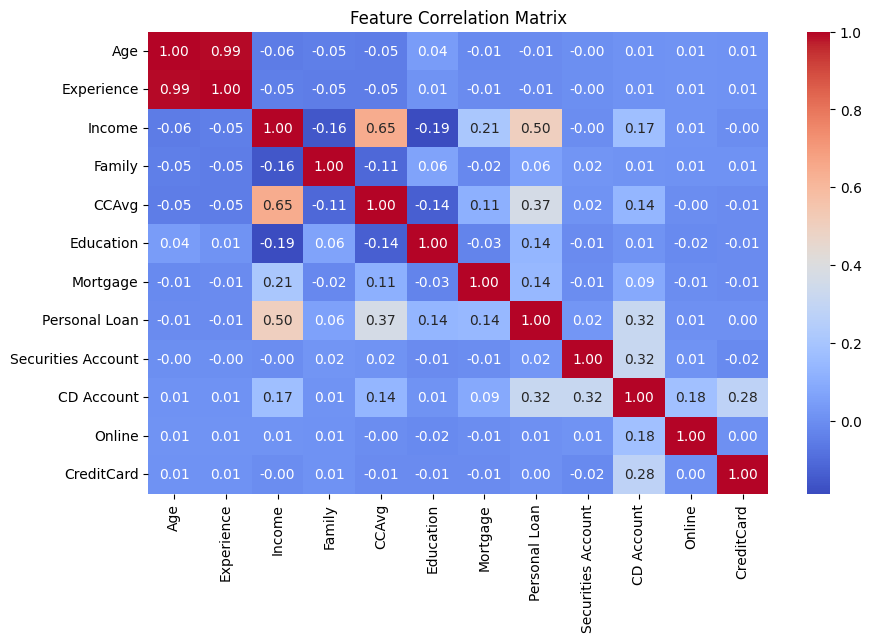

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

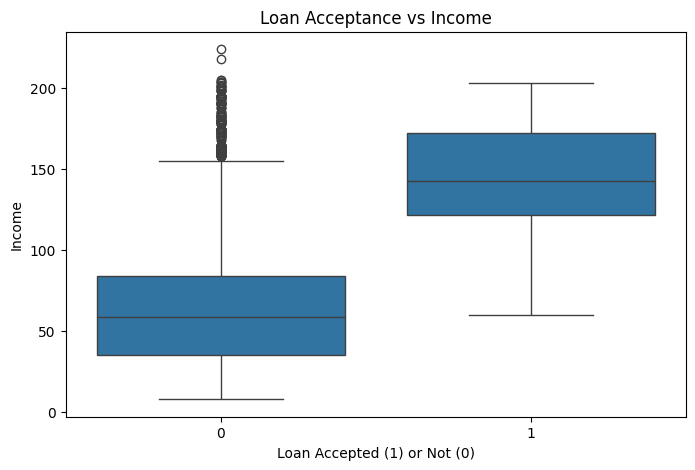

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Personal Loan", y="Income", data=df)
plt.title("Loan Acceptance vs Income")
plt.xlabel("Loan Accepted (1) or Not (0)")
plt.ylabel("Income")
plt.show()


In [8]:
X = df.drop(columns=["Personal Loan"])
y = df["Personal Loan"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)


In [12]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [14]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [15]:
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)


Model: Logistic Regression
Accuracy: 0.955
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix:
 [[883  12]
 [ 33  72]]

Model: Decision Tree
Accuracy: 0.984
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.93      0.91      0.92       105

    accuracy                           0.98      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000

Confusion Matrix:
 [[888   7]
 [  9  96]]

Model: Random Forest
Accuracy: 0.991
Classification Report:
               precision    recall  f1-score   support

           0   

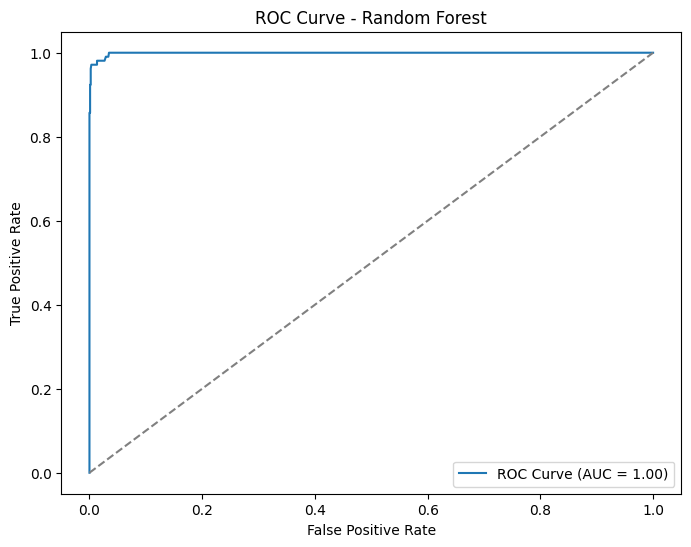

In [16]:
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [17]:
sample = pd.DataFrame([X.iloc[0]])  # You can change this to any input
sample_scaled = scaler.transform(sample)
prediction = rf.predict(sample)
print("Prediction (1 = Loan Accepted, 0 = Not Accepted):", prediction[0])

Prediction (1 = Loan Accepted, 0 = Not Accepted): 0
